In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy

from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.extensions import RXGate, RYGate, RZGate

In [2]:
n = 2

I_f = np.array([[1, 0],
              [0, 1]]) 
I = np.array([[1, 0],
              [0, 1]])
X_f = np.array([[0, 1],
              [1, 0]]) 
X = np.array([[0, 1],
              [1, 0]])    

for q in range(n-1):
    I_f = np.kron(I_f, I)
    X_f = np.kron(X_f, X)
J = Operator(1 / np.sqrt(2) * (I_f + 1j * X_f))    
J_dg = J.adjoint()
circ = QuantumCircuit(n,n)
circ.append(J, range(n))

dx = np.pi/2
dy = np.pi/4
dz = 0

for q in range(n):
    circ.append(RXGate(dx),[q])
    circ.append(RYGate(dy),[q])
    circ.append(RZGate(dz),[q])         
circ.append(J_dg, range(n))
circ.measure(range(n), range(n)) 

print(circ)

     ┌──────────┐┌─────────┐┌─────────┐┌───────┐┌──────────┐┌─┐   
q_0: ┤0         ├┤ RX(π/2) ├┤ RY(π/4) ├┤ RZ(0) ├┤0         ├┤M├───
     │  unitary │├─────────┤├─────────┤├───────┤│  unitary │└╥┘┌─┐
q_1: ┤1         ├┤ RX(π/2) ├┤ RY(π/4) ├┤ RZ(0) ├┤1         ├─╫─┤M├
     └──────────┘└─────────┘└─────────┘└───────┘└──────────┘ ║ └╥┘
c: 2/════════════════════════════════════════════════════════╩══╩═
                                                             0  1 


In [3]:
TOKEN = "9f38b2ed2b48336bd34f99cf232fdeb170157891f5f3136667531fc1b0ad58b2da2e8eb6be9ff4c6398b7aac4315257691f4e0d8104dfceffaa2dfc19a0907b6"
IBMQ.delete_account()
IBMQ.save_account(TOKEN, overwrite=True)
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

{'10': 4971, '01': 5029}


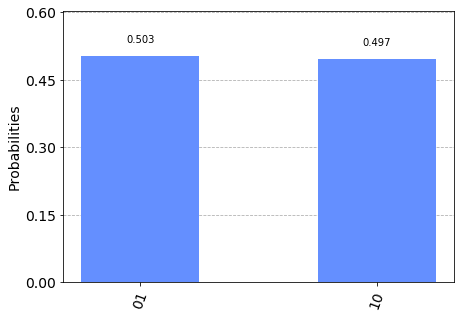

In [4]:
backend1 = Aer.get_backend('qasm_simulator')
job1 = execute(circ, backend=backend1, shots=10000)
result1 = job1.result()
measurement1 = result1.get_counts(circ)
print(measurement1)
plot_histogram(measurement1)

In [ ]:
backend2 = provider.get_backend('ibmq_16_melbourne')
job2 = execute(circ, backend=backend2, shots=8192)
result2 = job2.result()
measurement2 = result2.get_counts(circ)
print(measurement2)
plot_histogram(measurement2)

In [ ]:
backend3 = provider.get_backend('ibmq_athens')
job3 = execute(circ, backend=backend3, shots=8192)
result3 = job3.result()
measurement3 = result3.get_counts(circ)
print(measurement3)
plot_histogram(measurement3)

In [ ]:
backend4 = provider.get_backend('ibmq_manila')
job4 = execute(circ, backend=backend4, shots=8192)
result4 = job4.result()
measurement4 = result4.get_counts(circ)
print(measurement4)
plot_histogram(measurement4)

In [ ]:
backend5 = provider.get_backend('ibmq_santiago')
job5 = execute(circ, backend=backend5, shots=8192)
result5 = job5.result()
measurement5 = result5.get_counts(circ)
print(measurement5)
plot_histogram(measurement5)